In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def to_pixel_array(parquet_file_path):
    """
    Input:
    parquet_file_path = string; file path to the recon2D parquet files
    Output:
    pixel_array = np array with shape (num_events, 13, 21); 13x21 np array for all events
    x_size = np.array with shape (num_events,); array with the x cluster size for all events
    y_size = np.array with shape (num_events,); array with y cluster size for all events
    """
    temp_df = pd.read_parquet(parquet_file_path)
    temp_array = temp_df.to_numpy()
    pixel_array = temp_array.reshape(-1,13,21)
    x_size = np.count_nonzero(np.any(pixel_array >= 1, axis=1), axis=1) # require at least 1 electron charge
    y_size = np.count_nonzero(np.any(pixel_array >= 1, axis=2), axis=1) # require at least 1 electron charge
    return pixel_array, x_size, y_size

In [3]:
dataset = 'dataset_2su'

In [4]:
pixel_array_1, x_sizes_1, y_sizes_1 = to_pixel_array(glob.glob('/data/dajiang/smart-pixels/{}/{}_-7_7_-3_3_50x12P5_parquets/unflipped/recon2D*uncentered*.parquet'.format(dataset,dataset)))
pixel_array_2, x_sizes_2, y_sizes_2 = to_pixel_array(glob.glob('/data/dajiang/smart-pixels/{}/{}_-9_9_-5_5_50x12P5_parquets/unflipped/recon2D*uncentered*.parquet'.format(dataset,dataset)))
pixel_array_3, x_sizes_3, y_sizes_3 = to_pixel_array(glob.glob('/data/dajiang/smart-pixels/dataset_2s/dataset_2s_50x12P5_parquets/unflipped/recon2D*.parquet'))

In [5]:
print(len(x_sizes_2[x_sizes_2==0]))
print(len(y_sizes_2[y_sizes_2==0]))

14467
14467


/tmp/ipykernel_2101599/1972097332.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


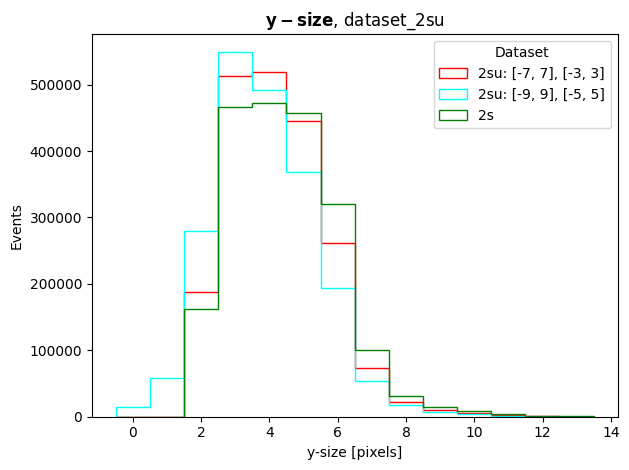

In [6]:
# y size
fig, ax = plt.subplots()
bins=np.linspace(-0.5,13.5,15)

ax.hist(y_sizes_1, bins=bins, histtype='step', label='2su: [-7, 7], [-3, 3]', color='red')
ax.hist(y_sizes_2, bins=bins, histtype='step', label='2su: [-9, 9], [-5, 5]', color='cyan')
ax.hist(y_sizes_3, bins=bins, histtype='step', label='2s', color='green')

ax.legend(title='Dataset')
ax.set_title(r'$\mathbf{{y-size}}$, {}'.format(dataset))
ax.set_xlabel('y-size [pixels]')
ax.set_ylabel('Events')

fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_y_size.png'.format(dataset,dataset), dpi=300)
fig.show()

/tmp/ipykernel_2101599/1316355502.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


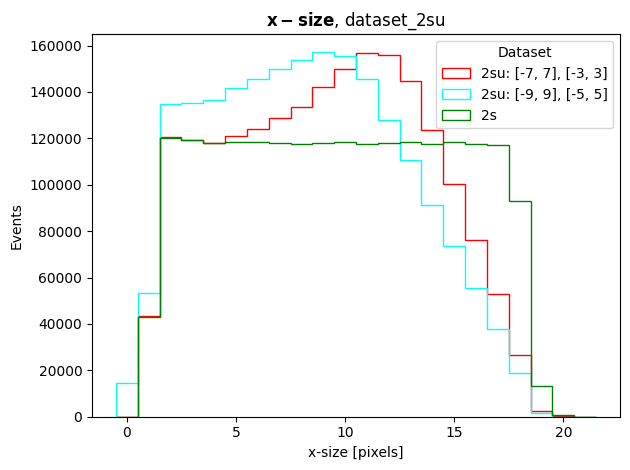

In [7]:
# x profile
fig, ax = plt.subplots()
bins=np.linspace(-0.5,21.5,23)

ax.hist(x_sizes_1, bins=bins, histtype='step', label='2su: [-7, 7], [-3, 3]', color='red')
ax.hist(x_sizes_2, bins=bins, histtype='step', label='2su: [-9, 9], [-5, 5]', color='cyan')
ax.hist(x_sizes_3, bins=bins, histtype='step', label='2s', color='green')

ax.legend(title='Dataset')
ax.set_title(r'$\mathbf{{x-size}}$, {}'.format(dataset))
ax.set_xlabel('x-size [pixels]')
ax.set_ylabel('Events')

fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_x_size.png'.format(dataset,dataset), dpi=300)
fig.show()